<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [282]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [283]:
# loading the data: Wholesale customers data

df = pd.read_csv('/Users/mac/IronHacks/W5/D2/lab-unsupervised-learning-en/data/Wholesale customers data.csv')
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [284]:
# Your code here:
print('=' * 50 + '\n')
print('Data Columns:\n',df.columns)



Data Columns:
 Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [285]:
print('=' * 50 + '\n')
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [286]:
print('=' * 50 + '\n')
print(df.dtypes)



Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [287]:
print('=' * 50 + '\n')
print(df.shape)



(440, 8)


In [288]:
print('=' * 50 + '\n')
print(df.isnull().sum())


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



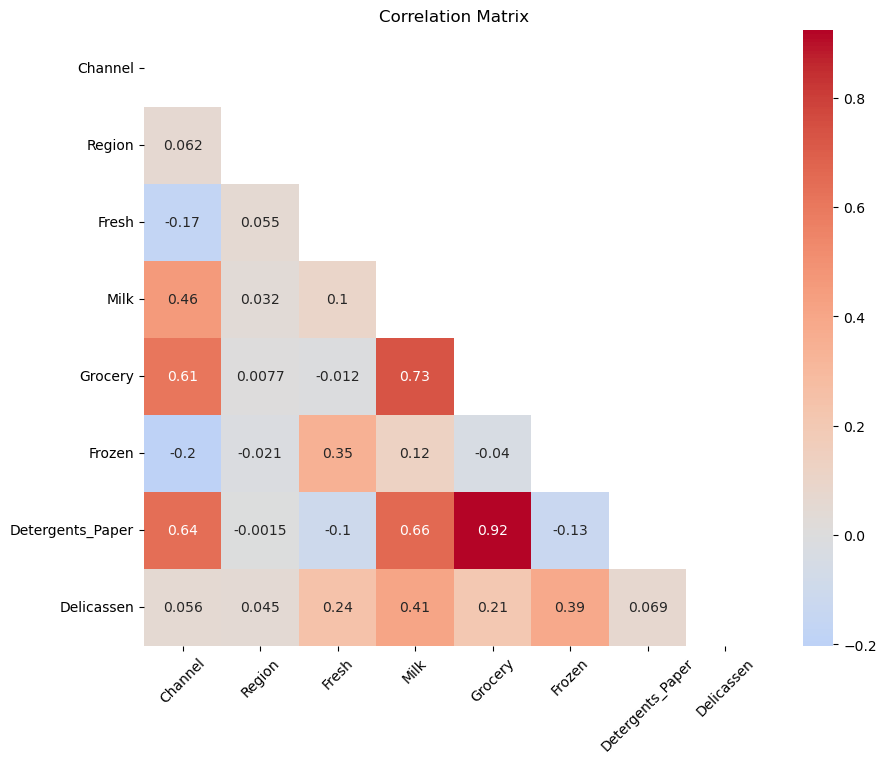

Strong Correlations (>0.7):
Milk vs Grocery: 0.728
Grocery vs Detergents_Paper: 0.925


In [289]:
# Análise de correlação
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm',
            mask=mask,
            center=0)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

# identify strong correlations
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_correlations.append(
                (correlation_matrix.columns[i], correlation_matrix.columns[j], 
                 correlation_matrix.iloc[i, j])
            )

print("Strong Correlations (>0.7):")
for corr in strong_correlations:
    print(f"{corr[0]} vs {corr[1]}: {corr[2]:.3f}")


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [290]:
# Your code here

# Separate numeric features for clustering
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
clean_customers = df[numeric_cols].copy()



**Your comment here**

- No missing data. Categorical columns (Channel, Region) are not used in clustering (since we’re clustering based on spending behavior), so we can exclude them from scaling/clustering but keep them for interpretation if needed.

- No outliers will be removed because clustering (especially K-Means) is sensitive to scaling, not necessarily outliers, and DBSCAN can treat outliers as noise.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [291]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler() # Initialize the scaler
customers_scale = scaler.fit_transform(clean_customers) # Fit and transform the data
customers_scale = pd.DataFrame(customers_scale, columns=numeric_cols) # Convert back to DataFrame

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [292]:
from sklearn.cluster import KMeans

# Your code here:

kmeans_2 = KMeans(n_clusters=2, # You can change this value to test other cluster numbers
                  random_state=42 # For reproducibility
                  )
kmeans_2.fit(customers_scale) # Fit the model. Fit hte model means that
labels_kmeans = kmeans_2.labels_ # Get the cluster labels

# Add to original data
clean_customers['Label'] = labels_kmeans

# Count
print("K-Means cluster counts:")
print(pd.Series(labels_kmeans).value_counts().sort_index())

K-Means cluster counts:
0    373
1     67
Name: count, dtype: int64


### Looking to the elbow we can choose 2 like the correct number of clusters

In [293]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [294]:
clean_customers['Label'] = clusters

Count the values in `labels`.

In [295]:
# Your code here:

clean_customers['Label'].value_counts().sort_index()

Label
0    414
1     26
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [296]:
from sklearn.cluster import DBSCAN 

# Your code here

# DBSCAN is used for density-based clustering
dbscan = DBSCAN(eps=0.3, # here we define eps, witch is the maximum distance between two samples for one to be considered in the neighborhood
                min_samples=4 # here we define min_samples, witch is the number of samples in a neighborhood for a point to be considered as a core point
                )
labels_dbscan = dbscan.fit_predict(customers_scale) # Fit and predict in one step by calling fit_predict of DBSCAN and store the labels on labels_dbscan

clean_customers['labels_DBSCAN'] = labels_dbscan # Add the DBSCAN labels to the DataFrame



Count the values in `labels_DBSCAN`.

In [297]:
# Your code here

clean_customers['labels_DBSCAN'].value_counts().sort_index()


labels_DBSCAN
-1    314
 0    109
 1     17
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

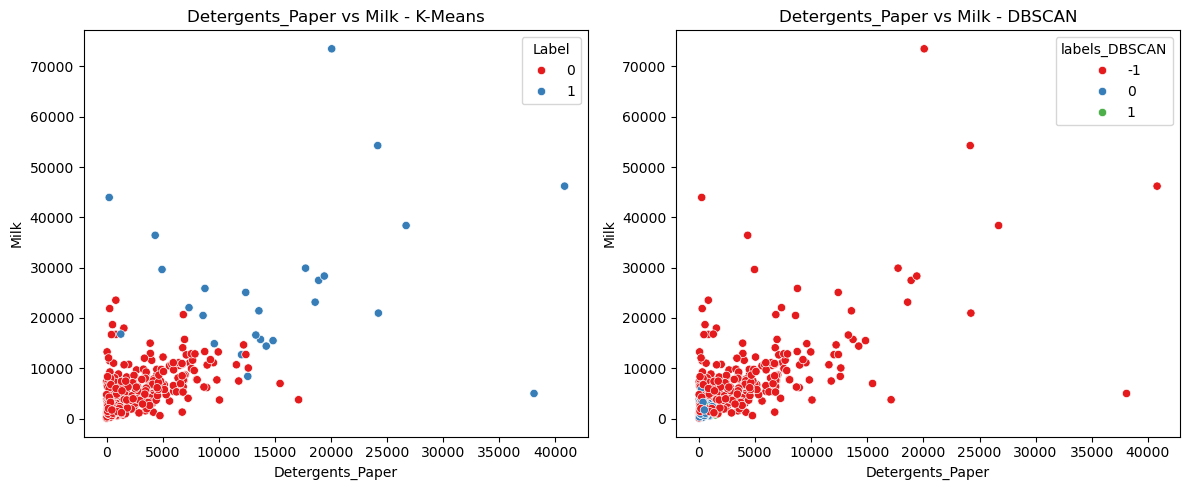

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns

# def to plot comparisons between K-Means and DBSCAN. The K-Means
def plot_comparison(x_col, y_col, title): # the x_col and y_col are the features to plot, and cames from strong correlations
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.scatterplot(data=clean_customers, x=x_col, y=y_col, hue='Label', ax=axes[0], palette='Set1')
    axes[0].set_title(f'{title} - K-Means')
    
    sns.scatterplot(data=clean_customers, x=x_col, y=y_col, hue='labels_DBSCAN', ax=axes[1], palette='Set1')
    axes[1].set_title(f'{title} - DBSCAN')
    
    plt.tight_layout()
    plt.show()

# 1. Detergents_Paper vs Milk
plot_comparison('Detergents_Paper', 'Milk', 'Detergents_Paper vs Milk')


In [299]:
# Your code here:

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

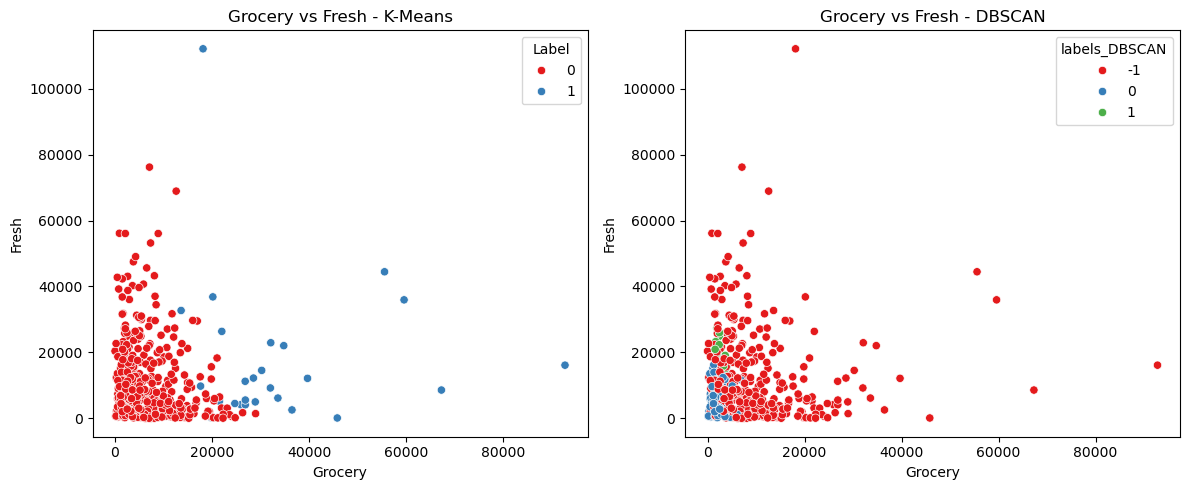

In [307]:
# Your code here:

# 2. Grocery vs Fresh
plot_comparison('Grocery', 'Fresh', 'Grocery vs Fresh')


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

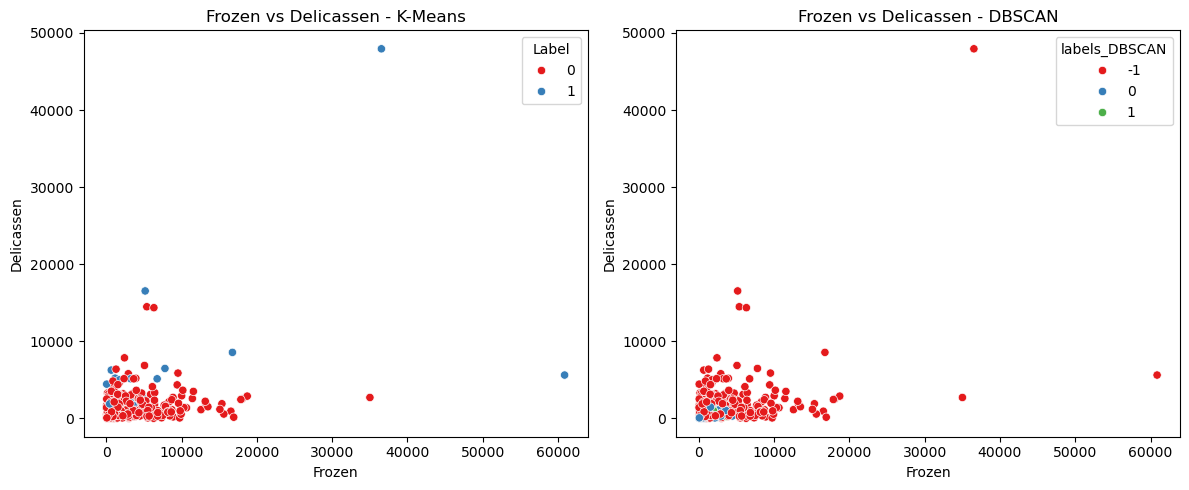

In [308]:
# Your code here:

# 3. Frozen vs Delicassen
plot_comparison('Frozen', 'Delicassen', 'Frozen vs Delicassen')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [309]:
# Your code here:

print("K-Means cluster means:")
print(clean_customers.groupby('Label')[numeric_cols].mean())

print("\nDBSCAN cluster means:")
print(clean_customers.groupby('labels_DBSCAN')[numeric_cols].mean())



K-Means cluster means:
              Fresh          Milk       Grocery       Frozen  \
Label                                                          
0      11631.954106   4501.065217   6320.971014  2866.304348   
1      17865.461538  26419.846154  33910.769231  6346.153846   

       Detergents_Paper   Delicassen  
Label                                 
0           2094.799517  1286.115942  
1          15408.076923  5326.576923  

DBSCAN cluster means:
                      Fresh         Milk       Grocery       Frozen  \
labels_DBSCAN                                                         
-1             13384.082803  7450.194268  10265.417197  3649.394904   
 0              6733.321101  1688.513761   2129.733945  1484.055046   
 1             20211.588235  1585.176471   2534.117647  2586.941176   

               Detergents_Paper   Delicassen  
labels_DBSCAN                                 
-1                  3887.070064  1877.299363  
 0                   368.798165   624.522936

Which algorithm appears to perform better?

**Your observations here**

- K-Means (k=2) cleanly separates customers into:
    * Cluster 0: High Fresh, Frozen, Delicassen → likely Horeca (restaurants/hotels)
    * Cluster 1: High Milk, Grocery, Detergents_Paper → likely Retail (households)
    * DBSCAN with eps=0.5 produces many points labeled -1 (noise)—not useful here due to high dimensionality and dense data.
    * K-Means gives interpretable, balanced clusters that align with business context.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [303]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [304]:
# Your code here

**Your comment here**

- 